In [1]:
from erpub.pipeline.pipeline import Pipeline
from erpub.pipeline.blocking import naive_all_pairs, same_year_of_publication
from erpub.pipeline.matching import jaccard_similarity, vector_embeddings
from erpub.experiment_utils import plot_matching_accs, evaluate_blocking_method, get_accuracy_of_matches
import numpy as np


# Default pipeline

In [2]:
thresholds = [0.3, 0.6, 0.9]

In [3]:
accs = []
for threshold in thresholds:
    pipeline = Pipeline(
        file_dir="data/prepared/",
        verbose=False,
    )
    pipeline.run(f"experiments/{threshold}", threshold)
    accs.append(get_accuracy_of_matches(f"experiments/{threshold}/matched_entities.csv"))

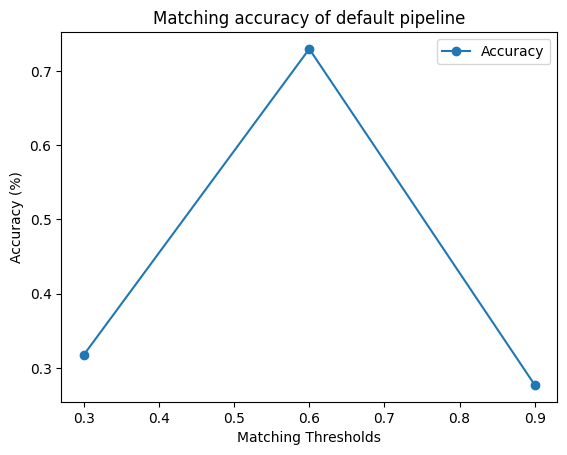

In [4]:
plot_matching_accs("Matching accuracy of default pipeline", thresholds, accs)

In [5]:
accs = []
for threshold in thresholds:
    pipeline = Pipeline(
        file_dir="data/prepared/",
        matching_fns={"paper_title": jaccard_similarity, "author_names": jaccard_similarity, "year_of_publication": jaccard_similarity},
        verbose=False,
    )
    pipeline.run(f"experiments/{threshold}_3_columns/", threshold)
    accs.append(get_accuracy_of_matches(f"experiments/{threshold}_3_columns/matched_entities.csv"))

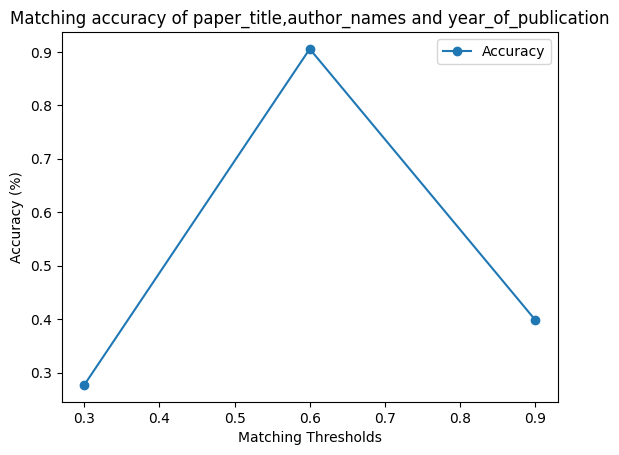

In [6]:
plot_matching_accs("Matching accuracy of paper_title,author_names and year_of_publication", thresholds, accs)

In [12]:
accs = []
thresholds = [0.5, 0.6, 0.7]
for threshold in thresholds:
    pipeline = Pipeline(
        file_dir="data/prepared/",
        preprocess_data_fn=lambda df: df.map(lambda x: x.lower()), # all lowercase
        matching_fns={"paper_title": jaccard_similarity, "author_names": jaccard_similarity, "year_of_publication": jaccard_similarity},
        verbose=False,
    )
    pipeline.run(f"experiments/{threshold}_3_columns_all_lowercase/", threshold)
    accs.append(get_accuracy_of_matches(f"experiments/{threshold}_3_columns_all_lowercase/matched_entities.csv"))

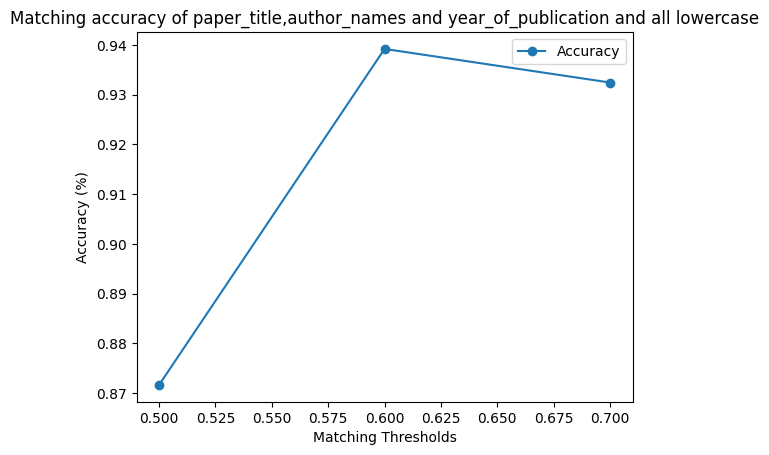

In [13]:
plot_matching_accs("Matching accuracy of paper_title,author_names and year_of_publication and all lowercase", thresholds, accs)

In [17]:
accs = []
thresholds = [0.5, 0.6, 0.7, 0.9]
for threshold in thresholds:
    pipeline = Pipeline(
        file_dir="data/prepared/",
        preprocess_data_fn=lambda df: df.map(lambda x: x.lower()), # all lowercase
        matching_fns={"paper_title": vector_embeddings, "author_names": jaccard_similarity, "year_of_publication": jaccard_similarity},
        embeddings_for_matching="embeddings/glove.6B.50d.txt",
        verbose=False,
    )
    pipeline.run(f"experiments/{threshold}_3_columns_all_lowercase_and_vec_embeddings/", threshold)
    accs.append(get_accuracy_of_matches(f"experiments/{threshold}_3_columns_all_lowercase_and_vec_embeddings/matched_entities.csv"))

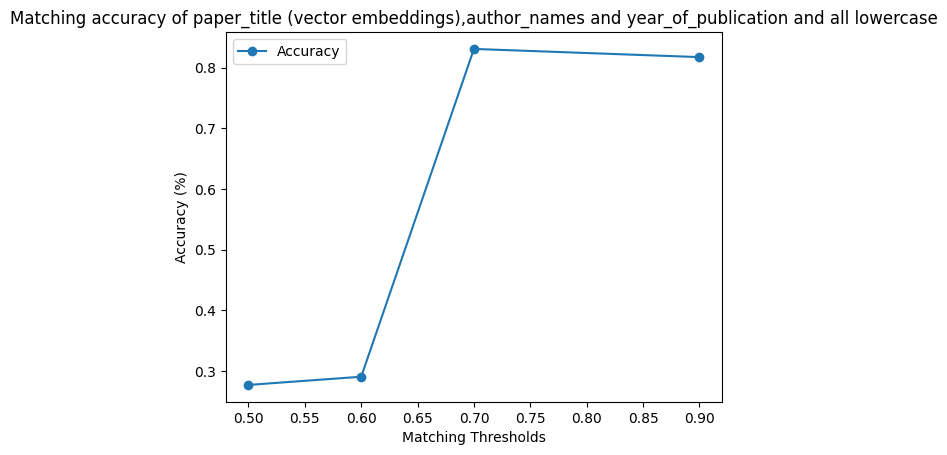

In [18]:
plot_matching_accs("Matching accuracy of paper_title (vector embeddings),author_names and year_of_publication and all lowercase", thresholds, accs)